In [1]:
import os, sys
import matplotlib.pyplot as plt
%matplotlib inline 
sys.path.append('/home/jp/projects/python_tools')
import jp_mpl as jplot
sys.path.append('/home/jp/projects/icecube/oscFit/modules')
import pickle, dataLoader
import numpy as np
from copy import deepcopy
reload(dataLoader)

<module 'dataLoader' from '/home/jp/projects/icecube/oscFit/modules/dataLoader.pyc'>

In [2]:
loader =  dataLoader.dataLoader(observables = 
                                ['reco_energy', 'reco_zenith'],# 'reco_energy'],
                                bin_edges   =    
                                [10**np.linspace(0.8,1.75,9),
                                 np.arccos(np.linspace(-1,0.,9))[::-1]],
                                user = 'quickstart', 
                                LEaxis = [],      
                                weight_keys = ['weight_e', 'weight_mu'],
                                detsys_nuspecs = {'domeff': [1., 1],
                                                  'hole_ice': [0.02, 2]},
                                detsys_muspecs = {'domeff': [1.0, -1]},
                                table_nbins = 150,
                                use_kde_bg  = False,
                                use_kde_sys = True,
                                detsys_redo = False,
                                verbose = False)


 ************************************ 
 **** oscFit3D v1.1 - dataLoader ****
 ************************************

dataLoader: Initializing user quickstart
dataLoader: Dummy observable(s) created to use 3D histograms
dataLoader: KDE is set ON, importing KDE tools
KDE_tools: KDE tool imported successfully.
dataLoader: Trying to load systematic histograms from file
Reading from file
dataLoader: MC loaded successfully!
dataLoader: Start loading muon MC (baseline_only= True , use_kde= False , quantile= (0.0, 1.0) ).
dataLoader: Muon background templates loaded successfully!
dataLoader: Systematic functions for nue  -  hole_ice
dataLoader: Systematic functions for nue  -  domeff
dataLoader: Systematic functions for numu  -  hole_ice
dataLoader: Systematic functions for numu  -  domeff
dataLoader: Systematic functions for nutau  -  hole_ice
dataLoader: Systematic functions for nutau  -  domeff
dataLoader: Systematic functions for nc  -  hole_ice
dataLoader: Systematic functions for nc  -  

In [3]:
loader.sysfcn['nue']['baseline_correction'][1,1,0](1)

1.0036930545226268

In [4]:
test1 = loader.getFullNuHistogram({'uphor_ratio':1., 'fluxTables':False, 'oscTables':True})
test2 = loader.getFullNuHistogram({'uphor_ratio':1., 'fluxTables':False, 'oscTables':False})

In [5]:
print 10000*test1['numu_histo']/test2['numu_histo']

[[[  9997.5 ]
  [  9998.27]
  [  9998.55]
  [  9999.03]
  [  9999.04]
  [  9999.53]
  [  9999.59]
  [  9999.84]]

 [[  9998.59]
  [  9999.3 ]
  [  9999.43]
  [  9999.47]
  [  9999.69]
  [  9999.65]
  [  9999.77]
  [  9999.91]]

 [[  9999.33]
  [  9999.61]
  [  9999.74]
  [  9999.78]
  [  9999.71]
  [  9999.71]
  [  9999.76]
  [  9999.9 ]]

 [[  9999.62]
  [  9999.82]
  [  9999.83]
  [  9999.89]
  [  9999.86]
  [  9999.86]
  [  9999.86]
  [  9999.95]]

 [[  9999.88]
  [  9999.91]
  [  9999.95]
  [  9999.96]
  [  9999.92]
  [  9999.92]
  [  9999.93]
  [  9999.94]]

 [[  9999.95]
  [  9999.96]
  [  9999.96]
  [  9999.98]
  [  9999.97]
  [  9999.98]
  [  9999.98]
  [ 10000.01]]

 [[  9999.98]
  [  9999.99]
  [  9999.99]
  [  9999.99]
  [  9999.98]
  [  9999.99]
  [  9999.98]
  [ 10000.  ]]

 [[  9999.99]
  [ 10000.  ]
  [  9999.99]
  [  9999.99]
  [  9999.99]
  [  9999.99]
  [ 10000.  ]
  [ 10000.01]]]


In [6]:
loader.modFlux.modNuBar_NuE?

In [7]:
# Test - magnitude of the baseline correction
# Compare the baseline correction vs original baseline mc set
print 'Baseline correction test'
print 'Mean should be close to zero; the std should be small [0.05,0.1]\n'
nu_corrected     = loader.getFullNuHistogram()
nu_no_correction = loader.getFullNuHistogram({'add_detector_systematics':False})
for histo in ['nue_histo','numu_histo','nutau_histo','nc_histo']:
    correction = (nu_corrected[histo] - nu_no_correction[histo] )/nu_no_correction[histo]
    print histo, ' correction\n mean', correction.mean(), ', std', correction.std()



Baseline correction test
Mean should be close to zero; the std should be small [0.05,0.1]

nue_histo  correction
 mean -0.00436663404833 , std 0.0409532475699
numu_histo  correction
 mean 0.000975220644245 , std 0.020415015953
nutau_histo  correction
 mean -0.00553368339314 , std 0.0552121499304
nc_histo  correction
 mean -0.0037236462367 , std 0.0551815880052


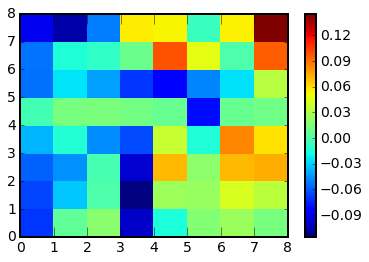

In [8]:
plt.pcolor(correction[:,:,0])
plt.colorbar()

In [9]:
# Do the muons as well
atmmu_corrected = loader.getFullAtmMuHistogram()
atmmu_no_correction = loader.getFullAtmMuHistogram({'add_detector_systematics':False})
correction = (atmmu_corrected - atmmu_no_correction)/atmmu_no_correction
print 'AtmMu correction\n mean', correction.mean(), ', std', correction.std()

KeyError: 'baseline'

In [10]:
import oscfit_default_values as dv
reload(dv)

<module 'oscfit_default_values' from '/home/jp/projects/icecube/oscFit/modules/oscfit_default_values.pyc'>

In [11]:
dv.default_data_settings['norm_e'] = 1.1
dv.default_data_settings['hole_ice'] = 0.015
dv.default_data_settings['domeff'] = 1.05
dv.default_data_settings['atmmu_template']='data'

In [12]:
mydata = loader.loadMCasData(settings=dv.default_data_settings)

dataLoader: atmmu_norm  0.0 , noise_norm 1.0


In [13]:
dv.default_data_settings['norm_nu']

1.0

In [14]:
loader.numu['baseline']['CC'].keys()

['ebin',
 'vtxz',
 'ma_qe',
 'interaction',
 'zenith',
 'weight_mu',
 'energy',
 'pid',
 'ptype',
 'zbin',
 'weight_e',
 'logE',
 'oneweight',
 'coszbin',
 'reco_zenith',
 'ma_res',
 'scattering',
 'logebin',
 'reco_energy']

In [15]:
loader.calculateEventParams(params=dv.default_data_settings, output_name = 'test')

KeyError: 'baseline'

In [16]:
(np.sum(loader.nue['baseline']['CC']['out_weight'])+
np.sum(loader.nue['baseline']['NC']['out_weight'])+
np.sum(loader.numu['baseline']['CC']['out_weight'])+
np.sum(loader.numu['baseline']['NC']['out_weight'])+
np.sum(loader.nutau['baseline']['CC']['out_weight'])+
np.sum(loader.atmmu['baseline']['out_weight']))


KeyError: 'baseline'

In [17]:
data = pickle.load(open('/home/jp/projects/icecube/oscFit_data/tables/oscFit_quickstart_data/test.pckl'))

In [18]:
w = 0
for x in data.keys():
    w += np.sum(data[x]['out_weight'])

In [19]:
data['numu'].keys()

['vtxz',
 'ma_qe',
 'interaction',
 'zenith',
 'weight_mu',
 'energy',
 'pid',
 'ptype',
 'out_weight',
 'weight_e',
 'reco_energy',
 'oneweight',
 'ma_res',
 'scattering',
 'reco_zenith']

In [20]:
print w

2279.3769753


(0.6, 0.7853981633974483)

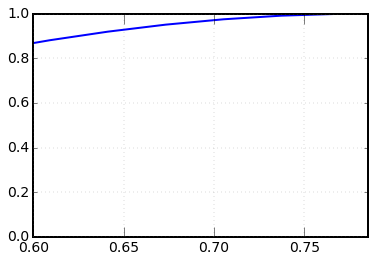

In [21]:
import numpy as np
x = np.linspace(0, np.pi/2.)
plt.plot(x, np.sin(2*x)**2)
plt.xlim([0.6, np.pi/4])

In [22]:
tArgs       = [ "dm31",  "theta23", "theta13","mix_angle", "norm","gamma", "norm_e", "norm_tau", "nu_nubar","nubar_ratio", "uphor_ratio",
                            "atmmu_f", "noise_f","hi_fwd", "dm41", "theta24", "theta34", "norm_nc", "pid_bias", "domeff", "had_escale", "hole_ice",
                            "axm_qe", "axm_res" ]
import oscfit_default_values as of
reload(of)

<module 'oscfit_default_values' from '/home/jp/projects/icecube/oscFit/modules/oscfit_default_values.pyc'>

In [23]:
tArgs.sort()
of.fit_keys.sort()

In [24]:
tArgs == of.fit_keys

False

In [25]:
xpoints = np.linspace(0.8, 1.2, 100)
detsys = 'domeff'
ptype = 'atmmu'
ei, zi = 1,1
xnominal = loader.detsys[ptype][detsys]['xnominal']
print loader.detsys[ptype][detsys]['coeffs'][ei,zi,0]
fcn = sf.exp_func(*loader.detsys[ptype][detsys]['coeffs'][ei,zi,0], x0=1.)
y = fcn(xpoints)
plt.plot(xpoints, y)
plt.plot(loader.detsys[ptype][detsys]['xpoints'],
         loader.detsys[ptype][detsys]['y'][:,ei,zi,0]/loader.detsys[ptype][detsys]['y'][xnominal,ei,zi,0], 'x')


KeyError: 'domeff'

In [26]:
reload(sf)
from scipy.optimize import curve_fit
# Let's create a bunch of points
xvalues = np.linspace(0.8, 1.2, 3)
yvalues = 0.9+0.1*np.exp(-13.2*(xvalues-1.0)/1.0)
yvalues +=np.random.rand(len(yvalues))*0.3

xvalues = np.array([ 0.85,  1. ,   1.04 , 1.2  , 1.3 ])
yvalues = np.array([ 1.22 , 1.02 ,   1.  ,  1. ,   1.  ])


plt.plot(xvalues, yvalues, 'x')

# Try do a fit myself
f = lambda x,a,b,c: sf.exp_func.eval(x,a,b,c,x0=1.)
opt, cov = curve_fit(f, xvalues, yvalues,
                    p0=[0.1, -2, 0.8])
one_fit = sf.exp_func(*opt, x0=1.)
plt.plot(xvalues, one_fit(xvalues), 'xr')
print opt

NameError: name 'sf' is not defined

In [ ]:
xpoints = np.linspace(0.8, 1.2, 100)
detsys = 'domeff'
ptype = 'atmmu'
ei, zi = 1,1
xnominal = loader.detsys[ptype][detsys]['xnominal']
print loader.detsys[ptype][detsys]['coeffs'][ei,zi,0]
fcn = exp_func(*loader.detsys[ptype][detsys]['coeffs'][ei,zi,0], 
               x0 = loader.detsys[ptype][detsys]['xpoints'][xnominal])
y = fcn(xpoints)
plt.plot(xpoints, y)
plt.plot(loader.detsys[ptype][detsys]['xpoints'],
         loader.detsys[ptype][detsys]['y'][:,ei,zi,0]/loader.detsys[ptype][detsys]['y'][xnominal,ei,zi,0], 'x')


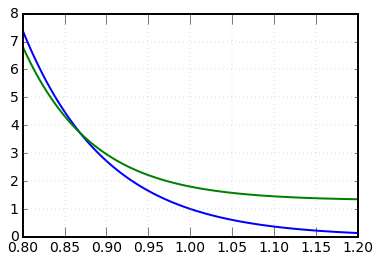

In [42]:
plt.plot(xpoints,
        exp_func.eval(xpoints, 1., -10, 1.))
plt.plot(xpoints,
        exp_func.eval(xpoints, 0.5, -12, 1.)+1.3)

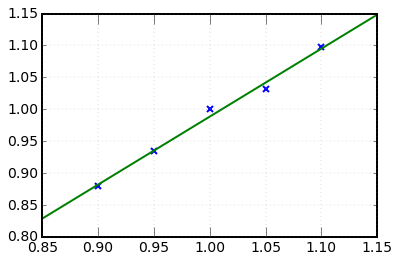

In [110]:
ptype='numu'
detsys = 'domeff'
xnominal = loader.detsys[ptype][detsys]['xnominal']
plt.plot(loader.detsys[ptype][detsys]['xpoints'],
         loader.detsys[ptype][detsys]['y'][:,3,6,0]/loader.detsys[ptype][detsys]['y'][xnominal,3,6,0], 'x')
xpoints = np.linspace(0.85, 1.15, 200)
plt.plot(xpoints, np.poly1d(loader.detsys[ptype][detsys]['coeffs'][3,6,0,:])(xpoints))

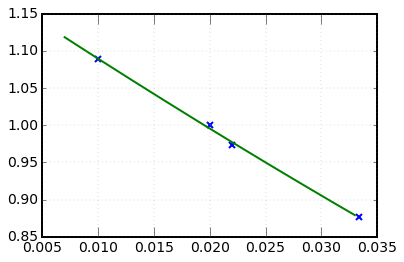

In [201]:
ptype='numu'
detsys = 'hole_ice'
xnominal = loader.detsys[ptype][detsys]['xnominal']
plt.plot(loader.detsys[ptype][detsys]['xpoints'],
         loader.detsys[ptype][detsys]['y'][:,3,6,0]/loader.detsys[ptype][detsys]['y'][xnominal,3,6,0], 'x')
xpoints = np.linspace(0.007, 0.033, 200)
plt.plot(xpoints, np.poly1d(loader.detsys[ptype][detsys]['coeffs'][3,6,0,:])(xpoints))

In [158]:
mylist = np.zeros_like(np.array([2,2]), dtype=object)

In [160]:
mylist[0] = exp_func

In [5]:
class exp_func:
    def __init__(self,a, b, x0):
        self.a, self.b, self.x0 = a, b, x0
        
    def __call__(self,x):
        return self.eval(x, self.a, self.b, self.x0)
        
    def derive(self,x):
        return np.array([np.exp(self.b*(x-self.x0)/self.x0), 
                         self.a*self.b/self.x0*np.exp(self.b*(x-self.x0)/self.x0)])
        
    @staticmethod
    def eval(x, a, b, x0):
        return a*np.exp(b*(x-x0)/x0)

    @property
    def coeffs(self):
        return [self.a, self.b]

    @coeffs.setter
    def coeffs(self, val):
        self.a, self.b = val